In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-payment-fraud-detection/onlinefraud.csv
/kaggle/input/fraud-detection/onlinefraud.csv


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sb
import matplotlib.pyplot as mp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import plot_tree
import sklearn.metrics as metrics
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/fraud-detection/onlinefraud.csv')

In [4]:
df.shape

(6362620, 11)

In [5]:
# Checking for null values within the dataset

print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
50%      1.327057e+05    2.146614e+05  0.000000e+00    0.000000e+00  
75%      9.430367e+05    1.111909e+06  0.000000e+00    0.000000e+00  
max      3.560159e+08    3.561793e+08  1.000000e+00    1.000000e+00

In [8]:
df.corr()

step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.022373      -0.010058       -0.010299   
amount          0.022373  1.000000      -0.002762       -0.007861   
oldbalanceOrg  -0.010058 -0.002762       1.000000        0.998803   
newbalanceOrig -0.010299 -0.007861       0.998803        1.000000   
oldbalanceDest  0.027665  0.294137       0.066243        0.067812   
newbalanceDest  0.025888  0.459304       0.042029        0.041837   
isFraud         0.031578  0.076688       0.010154       -0.008148   
isFlaggedFraud  0.003277  0.012295       0.003835        0.003776   

                oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
step                  0.027665        0.025888  0.031578        0.003277  
amount                0.294137        0.459304  0.076688        0.012295  
oldbalanceOrg         0.066243        0.042029  0.010154        0.003835  
newbalanceOrig        0.067812        0.041837 -0.008148        0.003776  
oldbalanceDest        1.000000        0.976569 -0.005885       -0.000513  
newbalanceDest        0.976569        1.000000  0.000535       -0.000529  
isFraud              -0.005885        0.000535  1.000000        0.044109  
isFlaggedFraud       -0.000513       -0.000529  0.044109        1.000000

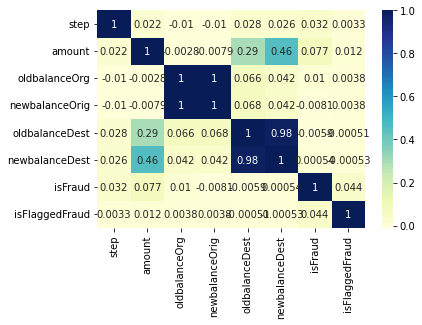

In [9]:
# plotting correlation heatmap to identify how the columns interact with each other
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
mp.show()

Data Reduction: Domain Knowledge

In [10]:
#dropping irrelevant columns 
dff= df.drop(['nameOrig','oldbalanceDest','newbalanceDest','step', 'isFlaggedFraud','nameDest'], axis=1)

In [11]:
#new dataset
dff

type      amount  oldbalanceOrg  newbalanceOrig  isFraud
0         PAYMENT     9839.64      170136.00       160296.36        0
1         PAYMENT     1864.28       21249.00        19384.72        0
2        TRANSFER      181.00         181.00            0.00        1
3        CASH_OUT      181.00         181.00            0.00        1
4         PAYMENT    11668.14       41554.00        29885.86        0
...           ...         ...            ...             ...      ...
6362615  CASH_OUT   339682.13      339682.13            0.00        1
6362616  TRANSFER  6311409.28     6311409.28            0.00        1
6362617  CASH_OUT  6311409.28     6311409.28            0.00        1
6362618  TRANSFER   850002.52      850002.52            0.00        1
6362619  CASH_OUT   850002.52      850002.52            0.00        1

[6362620 rows x 5 columns]

In [12]:
#Storing result in new file
df.to_csv('OnlineFraudTrainingData.csv')

Data Exploration

In [13]:
#what type of fraud it will be
dff.type

0           PAYMENT
1           PAYMENT
2          TRANSFER
3          CASH_OUT
4           PAYMENT
             ...   
6362615    CASH_OUT
6362616    TRANSFER
6362617    CASH_OUT
6362618    TRANSFER
6362619    CASH_OUT
Name: type, Length: 6362620, dtype: object

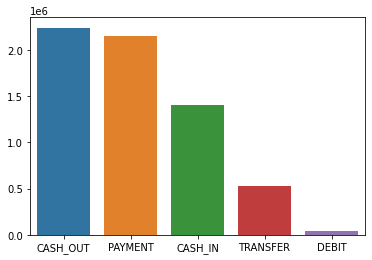

In [14]:
#Visualizing the most occuring type of fraud
df.type.value_counts()
sb.barplot(x = df.type.value_counts().index, y = df.type.value_counts().values)
plt.show()

In [15]:
dff.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

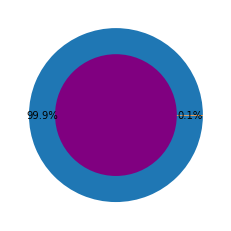

In [16]:
plt.pie(df.isFraud.value_counts(),
        autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='purple')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [17]:
#Classifying the data for model fitting 

# class count
class_count_0, class_count_1 = dff['isFraud'].value_counts()

# Separate class
class_0 = dff[dff['isFraud'] == 0]
class_1 = dff[dff['isFraud'] == 1]

# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (6354407, 5)
class 1: (8213, 5)


total class of 1 and0: 0    8213
1    8213
Name: isFraud, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

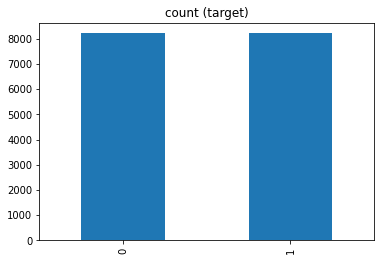

In [18]:
class_0_under = class_0.sample(class_count_1)

balanced = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",balanced['isFraud'].value_counts())

# plot the count after classification  
balanced['isFraud'].value_counts().plot(kind='bar', title='count (target)')

In [19]:
balanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16426 entries, 684103 to 6362619
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            16426 non-null  object 
 1   amount          16426 non-null  float64
 2   oldbalanceOrg   16426 non-null  float64
 3   newbalanceOrig  16426 non-null  float64
 4   isFraud         16426 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 770.0+ KB


Data Conversion

In [20]:
#to include the type into our model building

balanced["type"] = balanced["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})

In [21]:
balanced.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFraud'], dtype='object')

In [22]:
X = balanced[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']]
Y = balanced.loc[:,'isFraud']
classes = ['1', '0']

In [23]:
#splitting the data into test and training datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

In [24]:
X_train.shape,X_test.shape

((9855, 4), (6571, 4))

In [25]:
#Scaler is included to define the X training and test set 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
#convert Y values to categorical values of class 0 or 1
fraud = preprocessing.LabelEncoder()
Y_train = fraud.fit_transform(Y_train)
Y_test = fraud.fit_transform(Y_test)

Data Modeling

In [27]:
#models we will be exploring
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "Naive Bayes":GaussianNB() }

In [28]:
#Fitting the model into the dataset
for name, model in models.items():
    print(f'Training Model {name} \ML GROUP')
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print(f'Training Accuracy: {accuracy_score(Y_train, model.predict(X_train))}')
    print(f'Testing Accuracy: {accuracy_score(Y_test, Y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(Y_test, Y_pred)}')
    print("Recall Score : ",recall_score(Y_test, Y_pred, pos_label='positive', average='micro'))    
    print("Precision Score : ",precision_score(Y_test, Y_pred,  pos_label='positive',average='micro'))     
    print(f"Testing F-1:", f1_score(Y_test, Y_pred, pos_label='positive', average='micro' )        )
    print(f"Testing F-Beta:", fbeta_score(Y_test, Y_pred, beta=0.5, pos_label='positive', average='micro'))
    print('-'*30)

Training Model LR \ML GROUP
Training Accuracy: 0.8725520040588534
Testing Accuracy: 0.8831228123573277
Testing Confusion Matrix: 
[[3173   86]
 [ 682 2630]]
Recall Score :  0.8831228123573277
Precision Score :  0.8831228123573277
Testing F-1: 0.8831228123573276
Testing F-Beta: 0.8831228123573277
------------------------------
Training Model KNN \ML GROUP


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels

Training Accuracy: 0.9908675799086758
Testing Accuracy: 0.9891949474965759
Testing Confusion Matrix: 
[[3203   56]
 [  15 3297]]
Recall Score :  0.9891949474965759
Precision Score :  0.9891949474965759
Testing F-1: 0.9891949474965759
Testing F-Beta: 0.9891949474965758
------------------------------
Training Model DT \ML GROUP
Training Accuracy: 1.0
Testing Accuracy: 0.9917820727438746
Testing Confusion Matrix: 
[[3227   32]
 [  22 3290]]
Recall Score :  0.9917820727438746
Precision Score :  0.9917820727438746
Testing F-1: 0.9917820727438746
Testing F-Beta: 0.9917820727438746
------------------------------
Training Model RF \ML GROUP


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels

Training Accuracy: 1.0
Testing Accuracy: 0.991934256581951
Testing Confusion Matrix: 
[[3222   37]
 [  16 3296]]
Recall Score :  0.991934256581951
Precision Score :  0.991934256581951
Testing F-1: 0.991934256581951
Testing F-Beta: 0.991934256581951
------------------------------
Training Model XGB \ML GROUP


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels

Training Accuracy: 0.997869101978691
Testing Accuracy: 0.9934560949627149
Testing Confusion Matrix: 
[[3231   28]
 [  15 3297]]
Recall Score :  0.9934560949627149
Precision Score :  0.9934560949627149
Testing F-1: 0.9934560949627149
Testing F-Beta: 0.9934560949627149
------------------------------
Training Model Naive Bayes \ML GROUP
Training Accuracy: 0.6677828513444952
Testing Accuracy: 0.6756962410591996
Testing Confusion Matrix: 
[[3131  128]
 [2003 1309]]
Recall Score :  0.6756962410591996
Precision Score :  0.6756962410591996
Testing F-1: 0.6756962410591996
Testing F-Beta: 0.6756962410591996
------------------------------


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels

CART (Decision Tree)

In [29]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

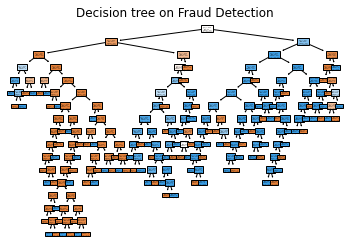

In [30]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier().fit(X_train,Y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree on Fraud Detection")
plt.show()

In [31]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print (y_pred)

[1 1 0 ... 1 1 0]


In [32]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9920864404200274


[Text(0.5952200940860215, 0.9705882352941176, 'X[2] <= -0.369\ngini = 0.5\nsamples = 9855\nvalue = [4954, 4901]'),
 Text(0.3087197580645161, 0.9117647058823529, 'X[2] <= -0.386\ngini = 0.276\nsamples = 4046\nvalue = [3378, 668]'),
 Text(0.09324596774193548, 0.8529411764705882, 'X[1] <= -0.44\ngini = 0.049\nsamples = 2027\nvalue = [1976, 51]'),
 Text(0.043010752688172046, 0.7941176470588235, 'X[0] <= -0.594\ngini = 0.481\nsamples = 57\nvalue = [23, 34]'),
 Text(0.021505376344086023, 0.7352941176470589, 'X[1] <= -0.44\ngini = 0.191\nsamples = 28\nvalue = [3, 25]'),
 Text(0.010752688172043012, 0.6764705882352942, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.03225806451612903, 0.6764705882352942, 'X[2] <= -0.386\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.021505376344086023, 0.6176470588235294, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.043010752688172046, 0.6176470588235294, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.06451612903225806, 0.73529411764705

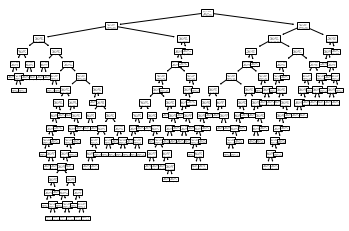

In [33]:
tree.plot_tree(clf)

In [34]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.914777050677218


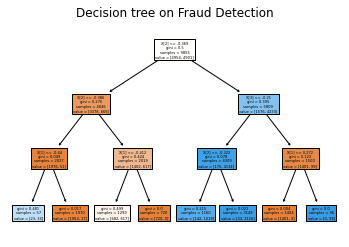

In [35]:
# Create Pruned Decision Tree
clf = DecisionTreeClassifier(criterion="gini", max_depth=3).fit(X_train,Y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree on Fraud Detection")
plt.show()

Random Forest Classification

In [36]:
# Instantiate and fit the RandomForestClassifier
model = RandomForestClassifier()
model.fit (X_train,Y_train)

RandomForestClassifier()

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
# Train
model.fit(X_train,Y_train)
# Extract single tree
estimator = model.estimators_[5]

In [38]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = X.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [39]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'FraudDetection.png', '-Gdpi=300'])

0

In [40]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'FraudDetection.png')

In [41]:
# make predictions for test data
Y_pred = model.predict(X_test)
predictions = [round(value) for value in Y_pred]

In [42]:
# evaluate predictions
Y_pred = model.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.9929995434484857

In [43]:
# evaluate predictions in percentage
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.30%


In [44]:
# evaluate predictions in percentage
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.30%


In [45]:
#View the classification report for test data and predictions
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3259
           1       0.99      1.00      0.99      3312

    accuracy                           0.99      6571
   macro avg       0.99      0.99      0.99      6571
weighted avg       0.99      0.99      0.99      6571



In [46]:
#making predictions with random values with the if condition
if  model.predict([[2,9735.34,100134.0,150297.35]])[0] == 0:
    print('not Fraud')
else: print('is Fraud')

is Fraud
